In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

In [5]:
data = pd.read_csv("C:\\Users\\vidha\\Downloads\\svm_test.csv")

In [6]:
X = data[['user_awardee_karma', 'user_awarder_karma', 'user_link_karma', 'user_comment_karma', 'self_text_vader_score', 'post_title_vader_score', 'combined_text_vader_score']]
y = data['controversiality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

c:\Users\vidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.94
Recall: 0.00
Precision: 0.00
F1-score: 0.00


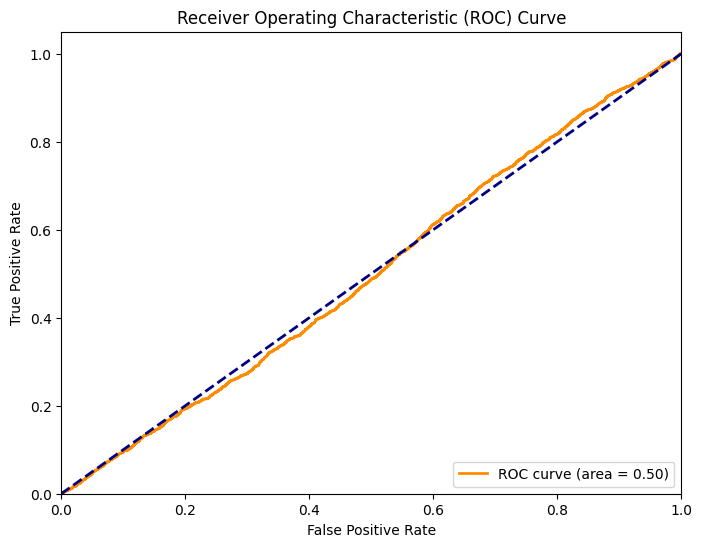

In [9]:
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

During a trial run of the above SVM model, all performance metrics such as precision, f1 score, and recall were reported as zero. So I tried running another with certain changes like using SMOTE to oversample the minority class.

In [12]:
# check distribution of target_class column

data['controversiality'].value_counts()

controversiality
0    171559
1     11235
Name: count, dtype: int64

In [1]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the SVM model on the resampled data
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

The above model kept running and did not give any output even after an hour. It was a trial using certain features. On getting final features, I will run this model again and see if it works or needs any changes.

Class Weighting:

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assign class weights
class_weights = {0: 1, 1: 3}  # Assign a higher weight to the minority class

# Train the SVM model with class weights
clf = SVC(class_weight=class_weights)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

Class distribution:
controversiality
0    171559
1     11235
Name: count, dtype: int64
Accuracy: 0.94
Recall: 0.00
Precision: 0.00
F1-score: 0.00


c:\Users\vidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


By running the above model, we still get zeros.

Combination of Oversampling and Undersampling:

In [8]:
# Combine oversampling and undersampling
smote = SMOTE()
rus = RandomUnderSampler()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

Class distribution:
controversiality
0    171559
1     11235
Name: count, dtype: int64


The above model keeps running.